In [63]:
import numpy as np
import pandas as pd
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

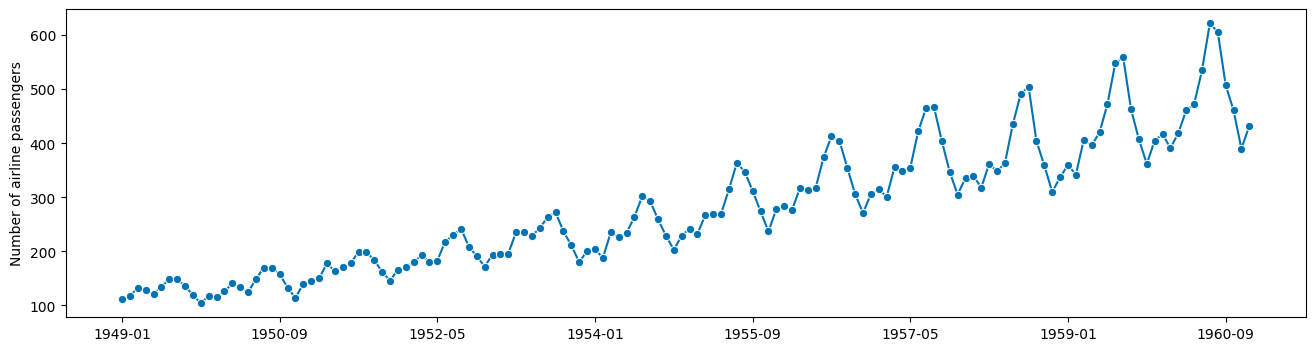

In [64]:
y = load_airline()

# plotting for visualization
plot_series(y)

In [65]:
type(y.index.values[0])

pandas._libs.tslibs.period.Period

In [66]:
p = y.index.values[0]


In [67]:
p

Period('1949-01', 'M')

In [68]:
p.end_time

Timestamp('1949-01-31 23:59:59.999999999')

In [69]:
fh = np.arange(1, 37)
print(fh)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]


In [70]:
from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")), is_relative=False
)
fh

ForecastingHorizon(['1961-01', '1961-02', '1961-03', '1961-04', '1961-05', '1961-06',
             '1961-07', '1961-08', '1961-09', '1961-10', '1961-11', '1961-12',
             '1962-01', '1962-02', '1962-03', '1962-04', '1962-05', '1962-06',
             '1962-07', '1962-08', '1962-09', '1962-10', '1962-11', '1962-12',
             '1963-01', '1963-02', '1963-03', '1963-04', '1963-05', '1963-06',
             '1963-07', '1963-08', '1963-09', '1963-10', '1963-11', '1963-12'],
            dtype='period[M]', is_relative=False)

In [71]:
pd.date_range("1961-01", periods=36, freq="M")

DatetimeIndex(['1961-01-31', '1961-02-28', '1961-03-31', '1961-04-30',
               '1961-05-31', '1961-06-30', '1961-07-31', '1961-08-31',
               '1961-09-30', '1961-10-31', '1961-11-30', '1961-12-31',
               '1962-01-31', '1962-02-28', '1962-03-31', '1962-04-30',
               '1962-05-31', '1962-06-30', '1962-07-31', '1962-08-31',
               '1962-09-30', '1962-10-31', '1962-11-30', '1962-12-31',
               '1963-01-31', '1963-02-28', '1963-03-31', '1963-04-30',
               '1963-05-31', '1963-06-30', '1963-07-31', '1963-08-31',
               '1963-09-30', '1963-10-31', '1963-11-30', '1963-12-31'],
              dtype='datetime64[ns]', freq='M')

In [72]:
from sktime.forecasting.naive import NaiveForecaster

In [73]:
forecaster = NaiveForecaster(strategy="last", sp=12)

In [74]:
forecaster.fit(y, fh=fh)

NaiveForecaster(sp=12)

In [75]:
y_pred = forecaster.predict(fh)

In [76]:
y_pred

1961-01    417.0
1961-02    391.0
1961-03    419.0
1961-04    461.0
1961-05    472.0
1961-06    535.0
1961-07    622.0
1961-08    606.0
1961-09    508.0
1961-10    461.0
1961-11    390.0
1961-12    432.0
1962-01    417.0
1962-02    391.0
1962-03    419.0
1962-04    461.0
1962-05    472.0
1962-06    535.0
1962-07    622.0
1962-08    606.0
1962-09    508.0
1962-10    461.0
1962-11    390.0
1962-12    432.0
1963-01    417.0
1963-02    391.0
1963-03    419.0
1963-04    461.0
1963-05    472.0
1963-06    535.0
1963-07    622.0
1963-08    606.0
1963-09    508.0
1963-10    461.0
1963-11    390.0
1963-12    432.0
Freq: M, Name: Number of airline passengers, dtype: float64

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

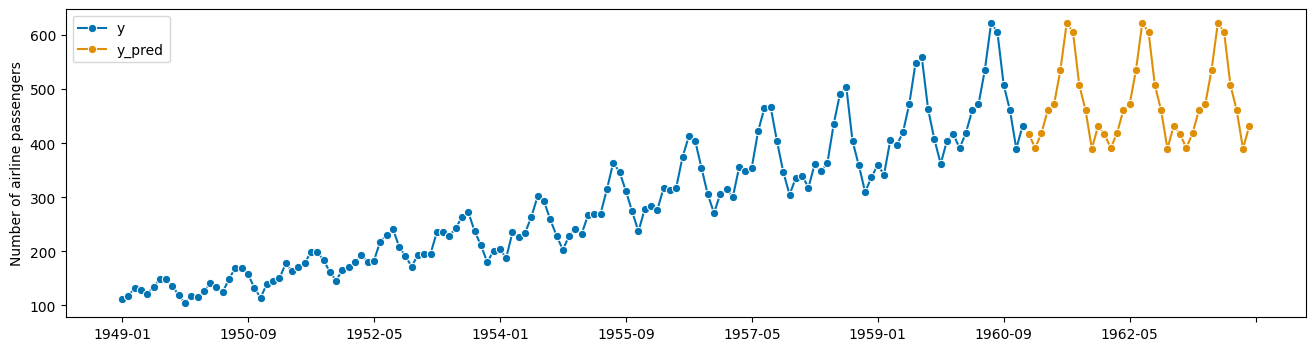

In [77]:
# plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

In [78]:
from sklearn.neighbors import KNeighborsRegressor

from sktime.forecasting.compose import make_reduction

In [79]:
from sklearn.model_selection import train_test_split

from sktime.datasets import load_airline
from sktime.split import temporal_train_test_split
from sktime.utils.plotting import plot_series


# declarative forecaster specification - just two lines!
regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = make_reduction(regressor, window_length=15, strategy="recursive")

In [80]:
y = load_airline()

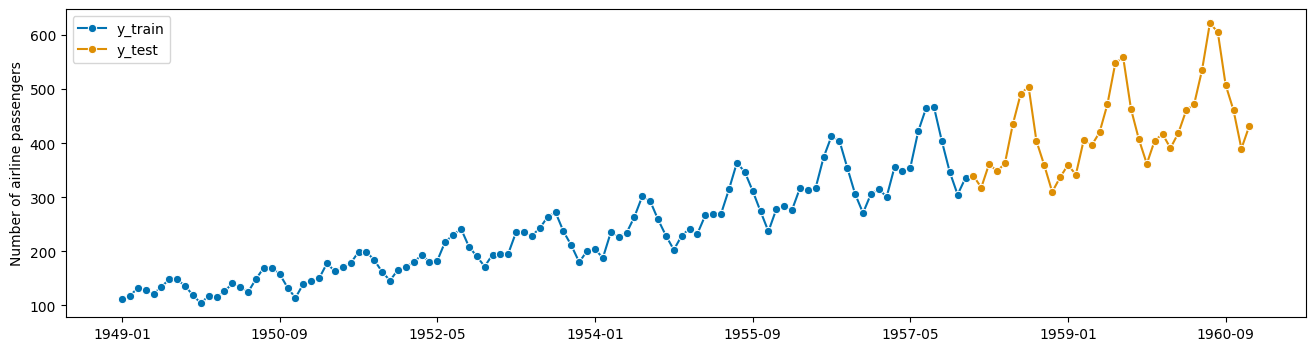

In [81]:
y_train, y_test = temporal_train_test_split(y)
plot_series(y_train, y_test, labels=["y_train", "y_test"]);

In [82]:
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

In [85]:
fh = np.arange(1, 37)

In [86]:

def split_into_train_test(data, in_num, fh):
    """
    Splits the series into train and test sets.

    Each step takes multiple points as inputs
    :param data: an individual TS
    :param fh: number of out of sample points
    :param in_num: number of input points for the forecast
    :return:
    """
    train, test = data[:-fh], data[-(fh + in_num) :]
    x_train, y_train = train[:-1], np.roll(train, -in_num)[:-in_num]
    x_test, y_test = test[:-1], np.roll(test, -in_num)[:-in_num]
    #     x_test, y_test = train[-in_num:], np.roll(test, -in_num)[:-in_num]

    # reshape input to be [samples, time steps, features]
    # (N-NF samples, 1 time step, 1 feature)
    x_train = np.reshape(x_train, (-1, 1))
    x_test = np.reshape(x_test, (-1, 1))
    temp_test = np.roll(x_test, -1)
    temp_train = np.roll(x_train, -1)
    for _ in range(1, in_num):
        x_train = np.concatenate((x_train[:-1], temp_train[:-1]), 1)
        x_test = np.concatenate((x_test[:-1], temp_test[:-1]), 1)
        temp_test = np.roll(temp_test, -1)[:-1]
        temp_train = np.roll(temp_train, -1)[:-1]

    return x_train, y_train, x_test, y_test

In [87]:
# here we split the time index, rather than the actual values,
# to show how we split the windows
feature_window, target_window, _, _ = split_into_train_test(
    np.arange(len(y)), 10, len(fh)
)

In [89]:
target_window

array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107])

In [90]:
feature_window[:5, :]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13]])

In [91]:
target_window[:5]

array([10, 11, 12, 13, 14])

In [92]:
# now we can split the actual values of the time series
x_train, y_train, x_test, y_test = split_into_train_test(y.values, 10, len(fh))
print(x_train.shape, y_train.shape)

(98, 10) (98,)


In [94]:
x_train

array([[112., 118., 132., 129., 121., 135., 148., 148., 136., 119.],
       [118., 132., 129., 121., 135., 148., 148., 136., 119., 104.],
       [132., 129., 121., 135., 148., 148., 136., 119., 104., 118.],
       [129., 121., 135., 148., 148., 136., 119., 104., 118., 115.],
       [121., 135., 148., 148., 136., 119., 104., 118., 115., 126.],
       [135., 148., 148., 136., 119., 104., 118., 115., 126., 141.],
       [148., 148., 136., 119., 104., 118., 115., 126., 141., 135.],
       [148., 136., 119., 104., 118., 115., 126., 141., 135., 125.],
       [136., 119., 104., 118., 115., 126., 141., 135., 125., 149.],
       [119., 104., 118., 115., 126., 141., 135., 125., 149., 170.],
       [104., 118., 115., 126., 141., 135., 125., 149., 170., 170.],
       [118., 115., 126., 141., 135., 125., 149., 170., 170., 158.],
       [115., 126., 141., 135., 125., 149., 170., 170., 158., 133.],
       [126., 141., 135., 125., 149., 170., 170., 158., 133., 114.],
       [141., 135., 125., 149., 17